In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Load in and visualize the data

In [164]:
df = pd.read_csv("movie_data.csv")

df.sentiment = df.sentiment.apply(lambda x: "positive" if x == 1 else "negative")

df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",positive
1,OK... so... I really like Kris Kristofferson a...,negative
2,"***SPOILER*** Do not read this, if you think a...",negative
3,hi for all the people who have seen this wonde...,positive
4,"I recently bought the DVD, forgetting just how...",negative


# Data Processing — convert to lower case

In [165]:
df['review'] = df['review'].apply(lambda x:x.lower())

In [166]:
df['review'][0]

'in 1974, the teenager martha moxley (maggie grace) moves to the high-class area of belle haven, greenwich, connecticut. on the mischief night, eve of halloween, she was murdered in the backyard of her house and her murder remained unsolved. twenty-two years later, the writer mark fuhrman (christopher meloni), who is a former la detective that has fallen in disgrace for perjury in o.j. simpson trial and moved to idaho, decides to investigate the case with his partner stephen weeks (andrew mitchell) with the purpose of writing a book. the locals squirm and do not welcome them, but with the support of the retired detective steve carroll (robert forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"murder in greenwich" is a good tv movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a kennedy. the powerful and rich famil

# Data Processing — remove punctuation

In [167]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [168]:
df['clean_text'] = df['review'].apply(lambda x:''.join([c for c in x if c not in punctuation]))

In [169]:
df['clean_text'][0]

'in 1974 the teenager martha moxley maggie grace moves to the highclass area of belle haven greenwich connecticut on the mischief night eve of halloween she was murdered in the backyard of her house and her murder remained unsolved twentytwo years later the writer mark fuhrman christopher meloni who is a former la detective that has fallen in disgrace for perjury in oj simpson trial and moved to idaho decides to investigate the case with his partner stephen weeks andrew mitchell with the purpose of writing a book the locals squirm and do not welcome them but with the support of the retired detective steve carroll robert forster that was in charge of the investigation in the 70s they discover the criminal and a net of power and money to cover the murderbr br murder in greenwich is a good tv movie with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a kennedy the powerful and rich family used their influence to cover the mu

In [170]:
df['len_review'] = df['clean_text'].apply(lambda x:len(x))

In [171]:
df.head()

,review,sentiment,clean_text,len_review
0,"in 1974, the teenager martha moxley (maggie gr...",positive,in 1974 the teenager martha moxley maggie grac...,1341
1,ok... so... i really like kris kristofferson a...,negative,ok so i really like kris kristofferson and his...,1195
2,"***spoiler*** do not read this, if you think a...",negative,spoiler do not read this if you think about wa...,1574
3,hi for all the people who have seen this wonde...,positive,hi for all the people who have seen this wonde...,378
4,"i recently bought the dvd, forgetting just how...",negative,i recently bought the dvd forgetting just how ...,656


#  Data Processing — create list of reviews

In [172]:
all_text2 = df['clean_text'].tolist()

### Tokenize — Create Vocab to Int mapping dictionary

In [173]:
from collections import Counter
all_text2 = ' '.join(all_text2)
# create a list of words
words = all_text2.split()

In [174]:
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [175]:
vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}

In [176]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [177]:
reviews_split = df['clean_text'].tolist()

##  Tokenize — Encode the words

In [178]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[7, 5997, 1, 2145, 4053, 30768, 4907, 1564, 1089, 5, 1, 21911, 1557, 4, 7210, 17133, 15073, 8805, 20, 1, 16023, 314, 3605, 4, 2154, 58, 13, 1862, 7, 1, 9156, 4, 41, 324, 2, 41, 594, 4558, 16371, 34936, 151, 302, 1, 776, 961, 34937, 1414, 21230, 36, 6, 3, 1085, 988, 1363, 11, 44, 2964, 7, 6087, 16, 51851, 7, 13906, 5884, 3134, 2, 1588, 5, 25365, 1057, 5, 3856, 1, 415, 15, 24, 1965, 1732, 2221, 3748, 3482, 15, 1, 1249, 4, 489, 3, 277, 1, 5409, 11683, 2, 78, 21, 2557, 93, 18, 15, 1, 1402, 4, 1, 5007, 1363, 1310, 10045, 592, 15378, 11, 13, 7, 2774, 4, 1, 3504, 7, 1, 994, 34, 1766, 1, 1748, 2, 3, 5533, 4, 663, 2, 291, 5, 1000, 1, 13234, 12, 594, 7, 15073, 6, 3, 49, 238, 17, 15, 1, 286, 66, 4, 3, 594, 4, 3, 3422, 151, 168, 250, 11, 13, 2301, 32, 3, 2955, 2145, 616, 430, 13, 3, 3228, 1, 959, 2, 972, 235, 322, 63, 2344, 5, 1000, 1, 594, 16, 51, 70, 1981, 151, 186, 3, 45598, 1363, 2, 6158, 81744, 7, 6087, 13, 473, 5, 26431, 85, 1, 4424, 847, 13, 2301, 1, 920, 257, 1, 3504, 4, 961, 2, 1, 233, 4

In [179]:
df.head()

,review,sentiment,clean_text,len_review
0,"in 1974, the teenager martha moxley (maggie gr...",positive,in 1974 the teenager martha moxley maggie grac...,1341
1,ok... so... i really like kris kristofferson a...,negative,ok so i really like kris kristofferson and his...,1195
2,"***spoiler*** do not read this, if you think a...",negative,spoiler do not read this if you think about wa...,1574
3,hi for all the people who have seen this wonde...,positive,hi for all the people who have seen this wonde...,378
4,"i recently bought the dvd, forgetting just how...",negative,i recently bought the dvd forgetting just how ...,656


### Tokenize — Encode the labels

In [180]:
labels_split = df['sentiment'].tolist()

In [181]:
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

## Analyze Reviews Length

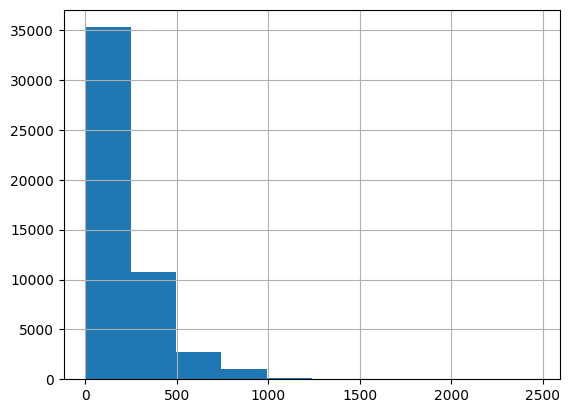

count    50000.000000
mean       230.258240
std        170.663887
min          4.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2469.000000
dtype: float64

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

###  Removing Outliers — Getting rid of extremely long or short reviews

In [183]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

### Padding / Truncating the remaining data

In [184]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [185]:
features = pad_features(reviews_int,200)

In [186]:
print (features[:10,:])

[[    7  5997     1 ...    85     1  4424]
 [  576    37     9 ...    10    17    39]
 [ 1448    78    21 ...   308  7473    36]
 ...
 [    0     0     0 ... 26432  1755 14178]
 [    0     0     0 ...     1  3844  7760]
 [    0     0     0 ...   796     5   386]]


In [187]:
len_feat = len(features)
split_frac = 0.8

### Training, Validation, Test Dataset Split

In [188]:
# 45000, 4000, 1000
split_frac = 0.9
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.8)]
valid_y = remaining_y[0:int(len(remaining_y)*0.8)]
test_x = remaining_x[int(len(remaining_x)*0.8):]
test_y = remaining_y[int(len(remaining_y)*0.8):]

In [189]:
type(test_y)

list

In [190]:
train_y = np.array(train_y)
test_y = np.array(test_y)
valid_y = np.array(valid_y)

## Dataloaders and Batching

In [191]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [192]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,    93,  1522, 14401],
        [   10,     6,    28,  ...,  7412,   283,     1],
        [    1,   728,   448,  ...,    28,  1895,  2593],
        ...,
        [    9,   201,    10,  ...,    29,    98,     2],
        [    0,     0,     0,  ...,    45,     4,   298],
        [    0,     0,     0,  ...,    13,    40,  1154]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0])


## Define the LSTM Network Architecture


In [193]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden
        

## Training the Network

## Instantiate the network

In [194]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(181686, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [195]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


## Training Loop
Most of the code in training loop is pretty standard Deep Learning training code that you might see often in all the implementations that’s using PyTorch framework.

In [196]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [197]:
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        #print(counter)

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.538158... Val Loss: 0.644520
Epoch: 1/4... Step: 200... Loss: 0.604442... Val Loss: 0.745335
Epoch: 1/4... Step: 300... Loss: 0.666734... Val Loss: 0.661724
Epoch: 1/4... Step: 400... Loss: 0.593951... Val Loss: 0.586811
Epoch: 1/4... Step: 500... Loss: 0.703097... Val Loss: 0.588787
Epoch: 1/4... Step: 600... Loss: 0.435450... Val Loss: 0.517556
Epoch: 1/4... Step: 700... Loss: 0.426830... Val Loss: 0.510345
Epoch: 1/4... Step: 800... Loss: 0.388835... Val Loss: 0.453349
Epoch: 1/4... Step: 900... Loss: 0.606141... Val Loss: 0.427082
Epoch: 2/4... Step: 1000... Loss: 0.370926... Val Loss: 0.491522
Epoch: 2/4... Step: 1100... Loss: 0.302783... Val Loss: 0.419146
Epoch: 2/4... Step: 1200... Loss: 0.457868... Val Loss: 0.383495
Epoch: 2/4... Step: 1300... Loss: 0.291203... Val Loss: 0.406486
Epoch: 2/4... Step: 1400... Loss: 0.351812... Val Loss: 0.389575
Epoch: 2/4... Step: 1500... Loss: 0.398371... Val Loss: 0.353847
Epoch: 2/4... Step: 1600... Loss: 

### Testing
- On Test Data

In [216]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0


true_list = []
pred_list = []
prob_list = []

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    true_list.extend(list(labels.cpu().numpy()))
    pred_list.extend(list(pred.cpu().detach().numpy().astype(int)))
    prob_list.extend(list(output.cpu().detach().numpy()))
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.374
Test accuracy: 0.854


### Classification report

In [226]:
from sklearn.metrics import classification_report

print(classification_report(true_list, pred_list, digits=3))

              precision    recall  f1-score   support

           0      0.826     0.890     0.857       492
           1      0.885     0.819     0.851       508

    accuracy                          0.854      1000
   macro avg      0.856     0.855     0.854      1000
weighted avg      0.856     0.854     0.854      1000



In [225]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(true_list, prob_list, pos_label=1)
auroc = metrics.auc(fpr, tpr)
print("Area under ROC curve:", auroc)

pr, re, thresholds = metrics.precision_recall_curve(true_list, prob_list, pos_label=1)
auprc = metrics.auc(re, pr)
print("Area under PR curve:", auprc)

Area under ROC curve: 0.9386282888419437
Area under PR curve: 0.9429526116580114


### On User-generated Data
First, we will define a tokenize function that will take care of pre-processing steps and then we will create a predict function that will give us the final output after parsing the user provided review.


In [199]:
# negative test review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'

In [200]:
def preprocess(review, vocab_to_int):
    review = review.lower()
    word_list = review.split()
    num_list = []
    #list of reviews
    #though it contains only one review as of now
    reviews_int = []
    for word in word_list:
        if word in vocab_to_int.keys():
            num_list.append(vocab_to_int[word])
    reviews_int.append(num_list)
    return reviews_int

In [201]:
def predict(net, test_review, sequence_length=200):
    ''' Prints out whether a give review is predicted to be 
        positive or negative in sentiment, using a trained model.
        
        params:
        net - A trained net 
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
        '''
    #change the reviews to sequence of integers
    int_rev = preprocess(test_review, vocab_to_int)
    #pad the reviews as per the sequence length of the feature
    features = pad_features(int_rev, seq_length=seq_length)
    
    #changing the features to PyTorch tensor
    features = torch.from_numpy(features)
    
    #pass the features to the model to get prediction
    net.eval()
    val_h = net.init_hidden(1)
    val_h = tuple([each.data for each in val_h])

    if(train_on_gpu):
        features = features.cuda()

    output, val_h = net(features, val_h)
    
    #rounding the output to nearest 0 or 1
    pred = torch.round(output)
    
    #mapping the numeric values to postive or negative
    output = ["Positive" if pred.item() == 1 else "Negative"]
    
    # print custom response based on whether test_review is pos/neg
    print(output)

In [202]:
# positive test review
test_review_pos = 'This movie had the best acting and the dialogue was so good. I loved it.'

In [203]:
# call function
# try negative and positive reviews!
seq_length=200
predict(net, test_review_pos, seq_length)

['Positive']
